<a href="https://colab.research.google.com/github/invegat/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/module1-OLS-regression/Log_linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intermediate Linear Regression Practice

## Use a Linear Regression model to get the lowest RMSE possible on the following dataset:

[Dataset Folder](https://github.com/ryanleeallred/datasets/tree/master/Ames%20Housing%20Data)

[Raw CSV](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv)

## You model must include (at least):
- A log-transformed y variable
- Two polynomial features
- One interaction feature
- 10 other engineered features

What is the lowest Root-Mean-Squared Error that you are able to obtain? Share your best RMSEs in Slack!

Notes:

There may be some data cleaning that you need to do on some features of this dataset. Linear Regression will only accept numeric values and will not accept

Note* There may not be a clear candidate for an interaction term in this dataset. Include one anyway, sometimes it's a good practice for predictive modeling feature engineering in general. 

In [2]:
!pip install -U matplotlib

    100% |████████████████████████████████| 12.9MB 2.7MB/s 
    100% |████████████████████████████████| 952kB 11.9MB/s 
yellowbrick 0.9 has requirement matplotlib<3.0,>=1.5.1, but you'll have matplotlib 3.0.2 which is incompatible.
  Found existing installation: matplotlib 2.1.2
    Uninstalling matplotlib-2.1.2:
      Successfully uninstalled matplotlib-2.1.2
  [matplotlib, mpl_toolkits]
You must restart the runtime in order to use newly installed versions.


In [100]:
%matplotlib inline
import matplotlib
matplotlib._version.sys.version

'3.6.7 (default, Oct 22 2018, 11:32:17) \n[GCC 8.2.0]'

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime
import math
from scipy.stats import mode

In [0]:
binaries = [f'{i:08b}' for i in range(1,100)]

In [120]:
pd.set_option('display.max_columns', 10000)
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [121]:
d = df.describe()
print(d.loc['75%', 'MSSubClass'])
d

70.0


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [0]:
# remove outliers
active_columns = ['OverallQual', 'GarageCars', 'GrLivArea', 'YearBuilt', 'YearRemodAdd', 'GarageArea', 'FullBath',
                  'TotalBsmtSF', '1stFlrSF']
 

# 'garageType-7'
for c in active_columns:
  if d.loc['75%', c] == 0:
    continue
  IQR = (d.loc['75%', c] - d.loc['25%',c]) * 1.5
  max_ = d.loc['75%', c] + IQR
  min_ = d.loc['25%', c] - IQR
  df = df[(pd.notnull(df[c])) & (df[c] < max_) & (df[c] > min_)]

dfb = df[active_columns]
dfb = pd.concat([dfb, df[['SalePrice', 'GarageType']]], axis=1)


In [0]:
# cats = df.select_dtypes(include=['category','object']).columns.unique().tolist()
cats = ['GarageType']

In [124]:

# # cats = ['MSZoning','Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
# #         'Condition1', 'Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
# #         'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
# #         'Heating','HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
# #         'GarageQual', 'GarageCond', 'PavedDrive','PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition' ]
for c in cats:
  cl = c[0].lower() + c[1:] + '-'
  types = df[c].unique().tolist() 

#   for i in range(min(8,len(types)+1)):
  i = 7
  print(types[0])
  dfb[cl + str(i)] = dfb[c].apply(lambda s: int(('00000000' if pd.isnull(s) else binaries[types.index(s)])[i]))   
dfbc = dfb.drop(cats,inplace=False, axis=1)
dfbc.head()




Attchd


,OverallQual,GarageCars,GrLivArea,YearBuilt,YearRemodAdd,GarageArea,FullBath,TotalBsmtSF,1stFlrSF,SalePrice,garageType-7
0,7,2,1710,2003,2003,548,2,856,856,208500,1
1,6,2,1262,1976,1976,460,2,1262,1262,181500,1
2,7,2,1786,2001,2002,608,2,920,920,223500,1
3,7,3,1717,1915,1970,642,1,756,961,140000,0
4,8,3,2198,2000,2000,836,2,1145,1145,250000,1


Index(['OverallQual', 'GarageCars', 'GrLivArea', 'YearBuilt', 'YearRemodAdd',
       'GarageArea', 'FullBath', 'TotalBsmtSF', '1stFlrSF', 'garageType-7'],
      dtype='object')


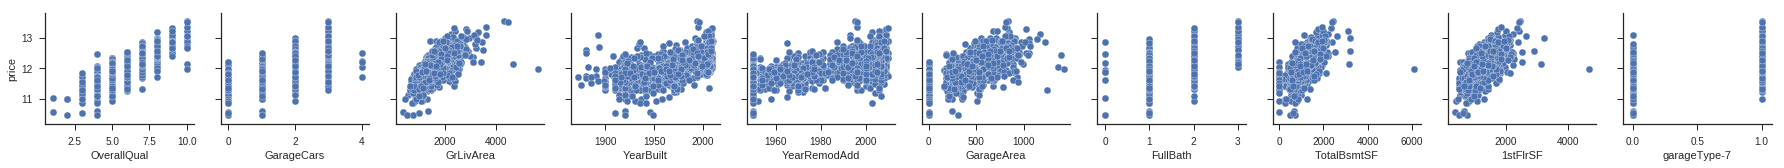

In [125]:
sns.set(style='ticks', color_codes=True)
columns = dfbc.columns.drop('SalePrice')
print(columns)
dfbc['price'] = np.log(dfbc['SalePrice'])
sns.pairplot(data=dfbc,
                  y_vars=['price'],
                  x_vars=columns);

In [0]:
# def test(d,c):
# #   print(c)
# #   print(str(type(d)))
#   dtype = str(type(d))
#   if   dtype != "<class 'numpy.int64'>" and \
#        dtype != "<class 'numpy.float64'>" and \
#        dtype != "<class 'int'>" and \
#        dtype != "<class 'float'>":
#     print('unknown',c,str(type(d)))
#     return None
# #   if math.isnan(d):
# #     print('changins Nan to None',c)
# #     return None
#   return d
#dfb.drop('Id', inplace=True, axis=1)
for c in dfb.select_dtypes(include=['float64','int64']).columns.values:
#   try:
#     if cats.index(c) >= 0:
#        continue
#   except:
#       pass
#   finally:
#     dfb[c] = dfb[c].apply(lambda d: None if (str(type(d)) != "<class 'numpy.int64'>") and 
#                           (str(type(d)) != "<class 'numpy.float64'>") else d)
    # dfb[c] = dfb[c].apply(lambda d: test(d,c))
    nnn = dfb[dfb[c].notnull()][c]
    if len(nnn) == 0:
      dfb.drop(c,inplace=True, axis=1)
      print(f'dropping {c}')
    else:
      dfb[c] = dfb[c].apply(lambda d: mode(nnn.dropna()).mode[0] if math.isnan(d) else d)
      nnnn= dfb[dfb[c].isnull()][c]
      if not nnnn.empty:
         print('Null', c, nnnn.shape)
         print(nnnn.head())
    

In [127]:
dfbc.drop('SalePrice',inplace=True, axis=1)
dfbc.head()

,OverallQual,GarageCars,GrLivArea,YearBuilt,YearRemodAdd,GarageArea,FullBath,TotalBsmtSF,1stFlrSF,garageType-7,price
0,7,2,1710,2003,2003,548,2,856,856,1,12.247694
1,6,2,1262,1976,1976,460,2,1262,1262,1,12.109011
2,7,2,1786,2001,2002,608,2,920,920,1,12.317167
3,7,3,1717,1915,1970,642,1,756,961,0,11.849398
4,8,3,2198,2000,2000,836,2,1145,1145,1,12.429216


In [128]:
price = dfbc.price
dfxp = dfbc.drop('price', inplace=False, axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(dfxp, price, test_size=.5, random_state=42)
X_train.shape

(730, 10)

In [0]:
model = LinearRegression()

In [130]:
X = X_train
y = Y_train

# Our data needs to have this shape to be accepted by sklearn
print(X.shape)
print(y.shape)
model.fit(X, y)
# print("Slope Coefficient: ", model.coef_)
# print("\nIntercept Value: ", model.intercept_)

(730, 10)
(730,)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [53]:
y = Y_train.values
r2_values = []
for c in X_train.columns.values:
  X = X_train[c].values.reshape(-1, 1)
  model.fit(X,y)
  y_train_predict = model.predict(X)
  r2_values.append((r2_score(y,y_train_predict),c))
r2_values.sort(reverse=True, key=lambda o: o[0])
#print(r2_values)
active_columns = r2_values[0:10]
print([o[1] for o in active_columns])

['OverallQual', 'GarageCars', 'GrLivArea', 'YearBuilt', 'garageType-7', 'YearRemodAdd', 'GarageArea', 'FullBath', 'TotalBsmtSF', '1stFlrSF']


In [131]:
# model.fit(X_train, Y_train)
y_test_predict = model.predict(X_test)

MSE = mean_squared_error(Y_test, y_test_predict)

RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print(f'Active columns vs log of SalePrice\nMSE is {MSE}')
print(f'RMSE is {RMSE}')

R2 = r2_score(Y_test, y_test_predict)

print(f'R^2 is {R2}')

Active columns vs log of SalePrice
MSE is 0.028517880179680984
RMSE is 0.16887237837989072
R^2 is 0.8289844570663348


Active columns only vs log of SalePrice Outlier filtering

MSE is 0.023304199986820626

RMSE is 0.1526571321190747

R^2 is 0.8298786112295135




All columns vs log of SalePrice  - No outlier filtering

MSE is 0.022184414716027827

RMSE is 0.14894433428643006

R^2 is 0.8669648759506945

# Stretch Goals

- Write a blog post explaining one of today's topics.
- Find a new regression dataset from the UCI machine learning repository and use it to test out your new modeling skillz.
 [ - UCI Machine Learning Repository - Regression Datasets](https://)
- Make a list for yourself of common feature engineering techniques. Browse Kaggle kernels to learn more methods.
- Start studying for tomorrow's topic: Gradient Descent
- Try and make the ultimate model with this dataset. clean as many features as possible, engineer the most sensible features as possible and see how accurate of a prediction you can make. 
- Learn about the "Dummy Variable Trap" and how it applies to linear regression modeling.
- Learning about using linear regression to model time series data